
# Previsão de Rendimento de Safra — PBL Fase 4  




## Sumário
1. [Introdução](#introducao)  
2. [Descrição do Dataset](#dados)  
3. [Metodologia](#metodologia)  
4. [Análise Exploratória (EDA)](#eda)  
5. [Clusterização](#cluster)  
6. [Modelagem Preditiva](#modelagem)  
7. [Avaliação & Comparação](#avaliacao)  
8. [Conclusões & Limitações](#conclusoes)  
9. [Referências](#refs)  
10. [Apêndice](#apendice)



## <a id="introducao"></a>Introdução  
Este notebook apresenta um pipeline completo para previsão de rendimento de safra, 
incluindo análise exploratória de dados (EDA), clusterização, modelagem preditiva e comparação de modelos.  
O objetivo é identificar padrões e prever com precisão o rendimento, auxiliando na tomada de decisão.  


## <a id="dados"></a>Descrição do Dataset

# Parte 1 - Analise exploratoria

## Limpeza e Organização do Dataset
Carregamos o dataset "crop_yield.csv" e verificamos que não há valores ausentes nem duplicados. Caso houvesse, seriam removido, e gerados um novo dataset chamado "crop_yield_cleaned.csv", que não teria linhas duplicadas ou linhas com valores faltantes.Como não houve alterações, o dataset original foi mantido sem criar uma nova versão.

In [1]:
import pandas as pd
print('tst')
# 1. Carregar o dataset
df = pd.read_csv('crop_yield.csv')

# 2. Verificar valores ausentes
print("Valores ausentes por coluna:\n", df.isnull().sum())

# 3. Remover duplicatas
initial_rows = df.shape[0]
df = df.drop_duplicates()
final_rows = df.shape[0]
print(f"Linhas removidas (duplicatas): {initial_rows - final_rows}")

# 4. Salvar o dataset limpo apenas se houver mudanças
if initial_rows != final_rows:
    df.to_csv('crop_yield_cleaned.csv', index=False)
    print("Dataset limpo salvo como 'crop_yield_cleaned.csv' devido a remoção de duplicatas")
else:
    print("Nenhuma mudança realizada; dataset original mantido")

tst
Valores ausentes por coluna:
 Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64
Linhas removidas (duplicatas): 0
Nenhuma mudança realizada; dataset original mantido


## divisão do dataset
Nesta etapa, dividimos o dataset original "crop_yield.csv" em vários outros, dividindo-os por cultura, criando quatro novos datasets: cocoa.csv, oil_palm.csv, rice.csv e rubber.csv.

### Interpretação:
A divisão por cultura é essencial porque o rendimento (Yield) será influenciado de formas diferentes em culturas diferentes, um certo tipo de cultura por exemplo pode produzir mais em periodos de alta temperatura, e outra cultura pode produzir mais em baixas temperaturas, fazendo com que as conclusões geradas pela Macine Learning não reflitam a realidade caso ela tratasse todas as culturas como uma cultura única.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Separar por cultura
df_cocoa = df[df['Crop'] == 'Cocoa, beans']
df_oil_palm = df[df['Crop'] == 'Oil palm fruit']
df_rice = df[df['Crop'] == 'Rice, paddy']
df_rubber = df[df['Crop'] == 'Rubber, natural']

# Salvar cada dataset novo
df_cocoa.to_csv('cocoa.csv', index=False)
df_oil_palm.to_csv('oil_palm.csv', index=False)
df_rice.to_csv('rice.csv', index=False)
df_rubber.to_csv('rubber.csv', index=False)

# Gráficos
Nesta etapa, geramos gráficos de dispersão para explorar as relações entre variáveis climáticas e o rendimento (Yield) para cada cultura, utilizando os datasets divididos (cocoa.csv, oil_palm.csv, rice.csv e rubber.csv). Adicionalmente, incluímos boxplots, histogramas e heatmaps de correlação para uma análise mais completa da distribuição e relações lineares.

## cocoa.csv

In [4]:
# Carregar o dataset cocoa.csv
df_cocoa = pd.read_csv('cocoa.csv')

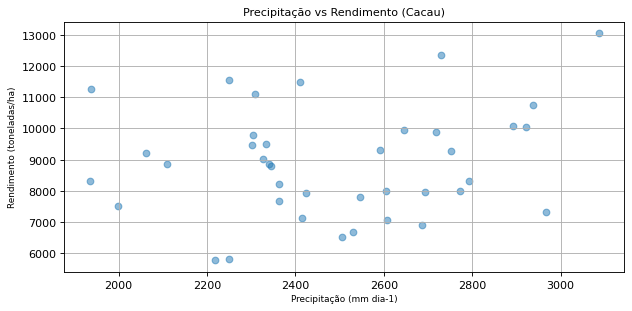

In [5]:
# 1. Gráfico de dispersão: Precipitação vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_cocoa['Precipitation (mm day-1)'], df_cocoa['Yield'], alpha=0.5)
plt.title('Precipitação vs Rendimento (Cacau)', fontsize=10)
plt.xlabel('Precipitação (mm dia-1)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

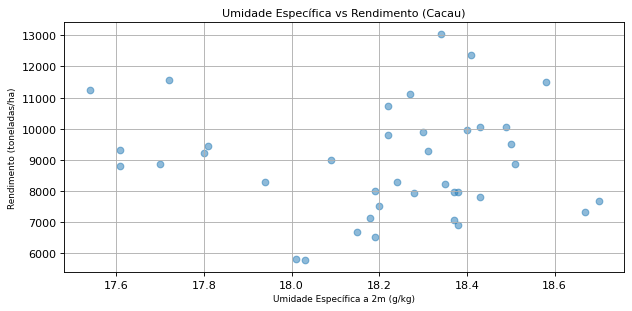

In [6]:
# 2. Gráfico de dispersão: Umidade Específica vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_cocoa['Specific Humidity at 2 Meters (g/kg)'], df_cocoa['Yield'], alpha=0.5)
plt.title('Umidade Específica vs Rendimento (Cacau)', fontsize=10)
plt.xlabel('Umidade Específica a 2m (g/kg)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

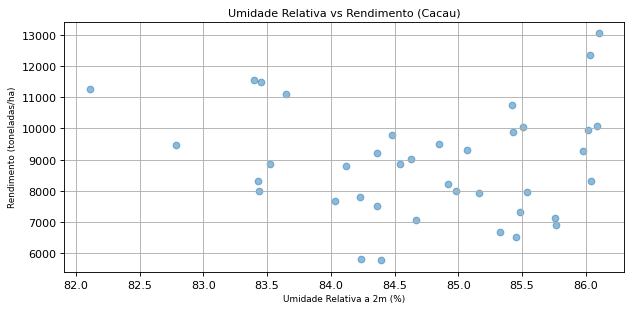

In [7]:
# 3. Gráfico de dispersão: Umidade Relativa vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_cocoa['Relative Humidity at 2 Meters (%)'], df_cocoa['Yield'], alpha=0.5)
plt.title('Umidade Relativa vs Rendimento (Cacau)', fontsize=10)
plt.xlabel('Umidade Relativa a 2m (%)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

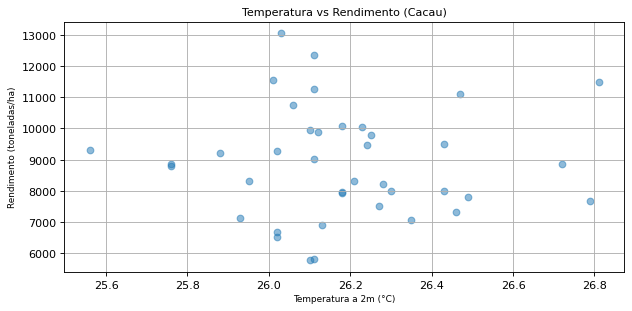

In [8]:
# 4. Gráfico de dispersão: Temperatura vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_cocoa['Temperature at 2 Meters (C)'], df_cocoa['Yield'], alpha=0.5)
plt.title('Temperatura vs Rendimento (Cacau)', fontsize=10)
plt.xlabel('Temperatura a 2m (°C)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

## oil_palm.csv

In [9]:
# Carregar o dataset cocoa.csv
df_oil_palm = pd.read_csv('oil_palm.csv')

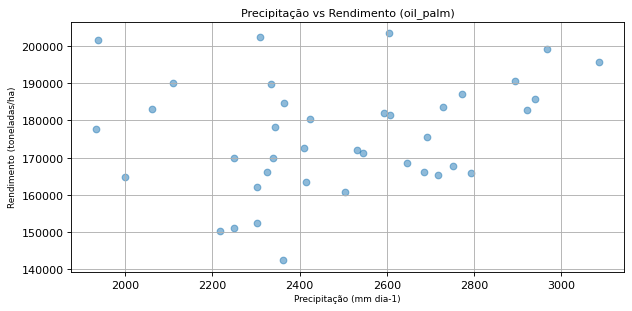

In [10]:
# 1. Gráfico de dispersão: Precipitação vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_oil_palm['Precipitation (mm day-1)'], df_oil_palm['Yield'], alpha=0.5)
plt.title('Precipitação vs Rendimento (oil_palm)', fontsize=10)
plt.xlabel('Precipitação (mm dia-1)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

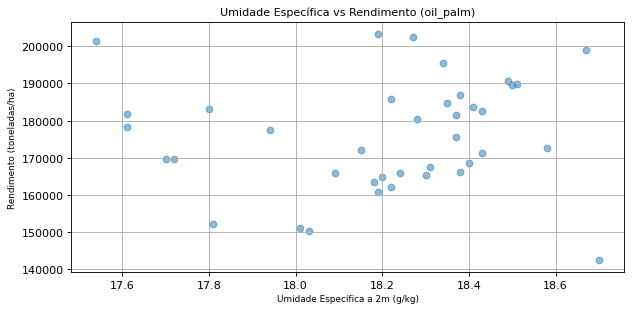

In [11]:
# 2. Gráfico de dispersão: Umidade Específica vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_oil_palm['Specific Humidity at 2 Meters (g/kg)'], df_oil_palm['Yield'], alpha=0.5)
plt.title('Umidade Específica vs Rendimento (oil_palm)', fontsize=10)
plt.xlabel('Umidade Específica a 2m (g/kg)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

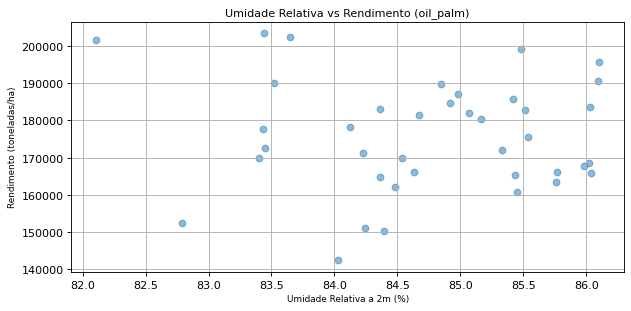

In [12]:
# 3. Gráfico de dispersão: Umidade Relativa vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_oil_palm['Relative Humidity at 2 Meters (%)'], df_oil_palm['Yield'], alpha=0.5)
plt.title('Umidade Relativa vs Rendimento (oil_palm)', fontsize=10)
plt.xlabel('Umidade Relativa a 2m (%)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

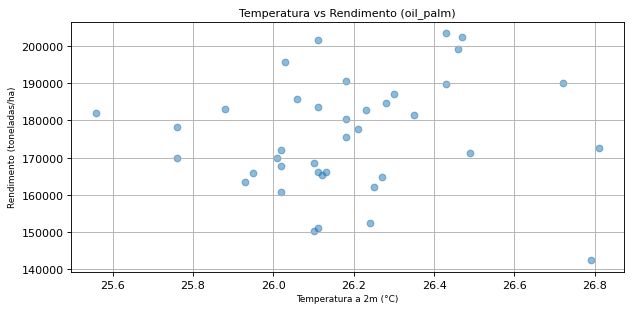

In [13]:
# 4. Gráfico de dispersão: Temperatura vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_oil_palm['Temperature at 2 Meters (C)'], df_oil_palm['Yield'], alpha=0.5)
plt.title('Temperatura vs Rendimento (oil_palm)', fontsize=10)
plt.xlabel('Temperatura a 2m (°C)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

## rice.csv

In [14]:
# Carregar o dataset cocoa.csv
df_rice = pd.read_csv('rice.csv')

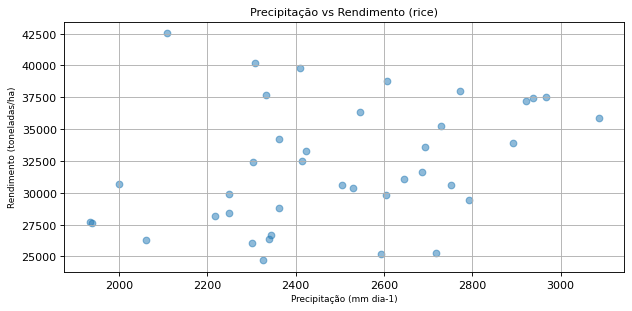

In [15]:
# 1. Gráfico de dispersão: Precipitação vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rice['Precipitation (mm day-1)'], df_rice['Yield'], alpha=0.5)
plt.title('Precipitação vs Rendimento (rice)', fontsize=10)
plt.xlabel('Precipitação (mm dia-1)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

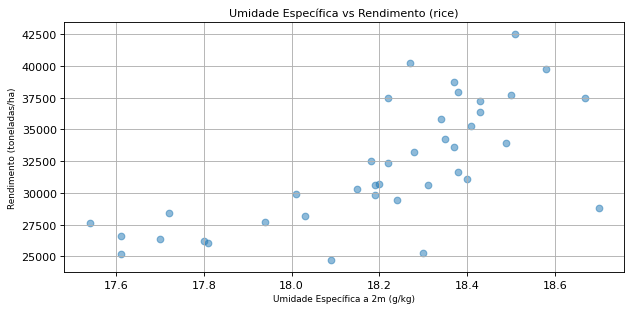

In [16]:
# 2. Gráfico de dispersão: Umidade Específica vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rice['Specific Humidity at 2 Meters (g/kg)'], df_rice['Yield'], alpha=0.5)
plt.title('Umidade Específica vs Rendimento (rice)', fontsize=10)
plt.xlabel('Umidade Específica a 2m (g/kg)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

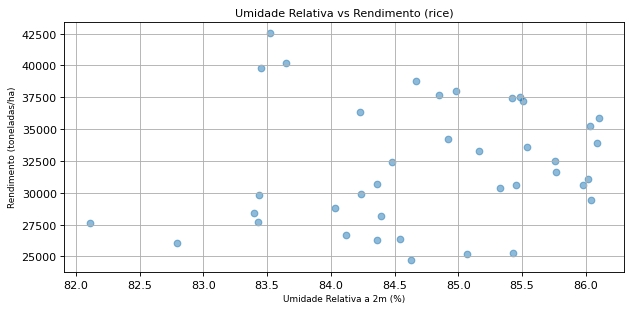

In [17]:
# 3. Gráfico de dispersão: Umidade Relativa vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rice['Relative Humidity at 2 Meters (%)'], df_rice['Yield'], alpha=0.5)
plt.title('Umidade Relativa vs Rendimento (rice)', fontsize=10)
plt.xlabel('Umidade Relativa a 2m (%)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

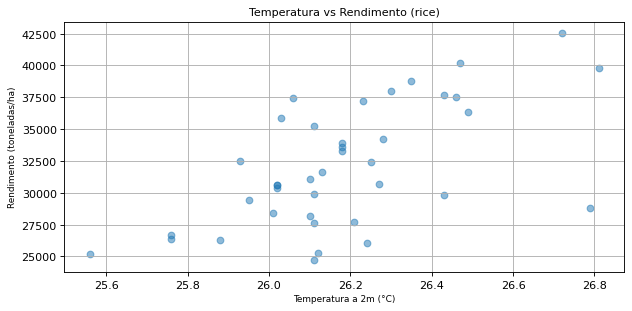

In [18]:
# 4. Gráfico de dispersão: Temperatura vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rice['Temperature at 2 Meters (C)'], df_rice['Yield'], alpha=0.5)
plt.title('Temperatura vs Rendimento (rice)', fontsize=10)
plt.xlabel('Temperatura a 2m (°C)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

## rubber.csv

In [19]:
# Carregar o dataset cocoa.csv
df_rubber = pd.read_csv('rubber.csv')

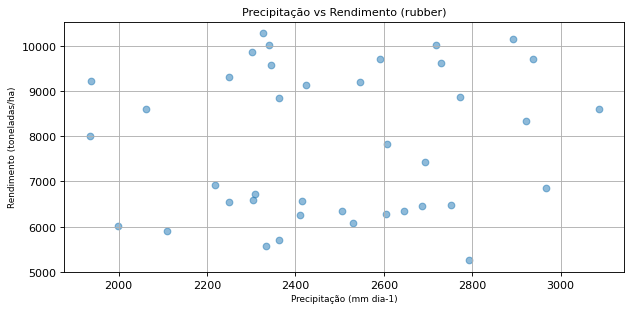

In [20]:
# 1. Gráfico de dispersão: Precipitação vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rubber['Precipitation (mm day-1)'], df_rubber['Yield'], alpha=0.5)
plt.title('Precipitação vs Rendimento (rubber)', fontsize=10)
plt.xlabel('Precipitação (mm dia-1)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

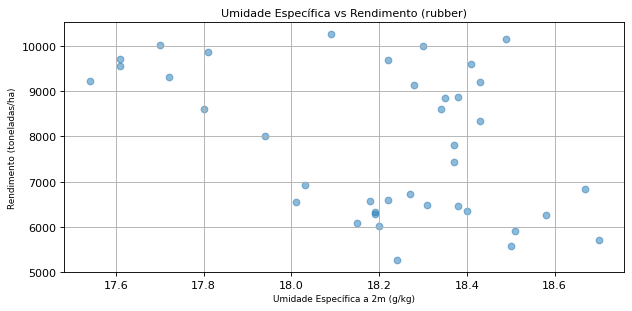

In [21]:
# 2. Gráfico de dispersão: Umidade Específica vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rubber['Specific Humidity at 2 Meters (g/kg)'], df_rubber['Yield'], alpha=0.5)
plt.title('Umidade Específica vs Rendimento (rubber)', fontsize=10)
plt.xlabel('Umidade Específica a 2m (g/kg)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

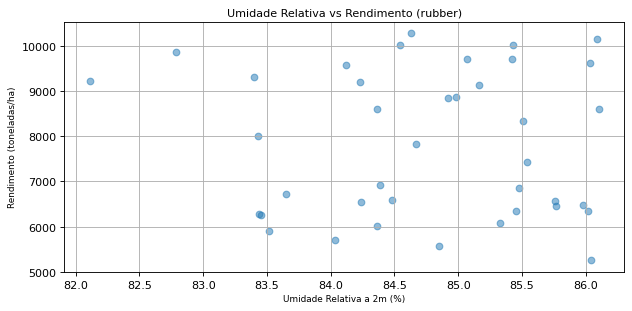

In [22]:
# 3. Gráfico de dispersão: Umidade Relativa vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rubber['Relative Humidity at 2 Meters (%)'], df_rubber['Yield'], alpha=0.5)
plt.title('Umidade Relativa vs Rendimento (rubber)', fontsize=10)
plt.xlabel('Umidade Relativa a 2m (%)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

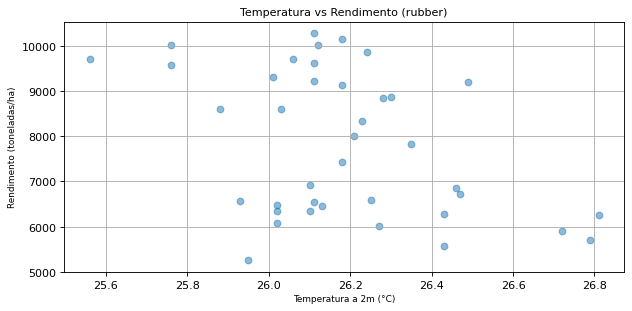

In [23]:
# 4. Gráfico de dispersão: Temperatura vs Rendimento
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(df_rubber['Temperature at 2 Meters (C)'], df_rubber['Yield'], alpha=0.5)
plt.title('Temperatura vs Rendimento (rubber)', fontsize=10)
plt.xlabel('Temperatura a 2m (°C)', fontsize=8)
plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

## Outros gráficos
Nesta etapa, adicionamos boxplots, histogramas e heatmaps de correlação para cada cultura (Cocoa, Oil Palm, Rice, Rubber) usando os datasets separados.

In [24]:
# Carregar os datasets
df_cocoa = pd.read_csv('cocoa.csv')
df_oil_palm = pd.read_csv('oil_palm.csv')
df_rice = pd.read_csv('rice.csv')
df_rubber = pd.read_csv('rubber.csv')

In [25]:
# Função para criar gráficos
def create_plots(df, crop_name):
    # 1. Boxplot de Yield
    plt.figure(figsize=(8, 4), dpi=60)
    plt.boxplot(df['Yield'])
    plt.title(f'Boxplot de Rendimento ({crop_name})', fontsize=10)
    plt.ylabel('Rendimento (toneladas/ha)', fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Histograma de Yield
    plt.figure(figsize=(8, 4), dpi=60)
    plt.hist(df['Yield'], bins=10, edgecolor='black')
    plt.title(f'Distribuição de Rendimento ({crop_name})', fontsize=10)
    plt.xlabel('Rendimento (toneladas/ha)', fontsize=8)
    plt.ylabel('Frequência', fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Heatmap de Correlação
    plt.figure(figsize=(7, 5), dpi=100)
    numeric_df = df[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
                     'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']]
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 6})
    plt.title(f'Matriz de Correlação ({crop_name})', fontsize=10)
    plt.tight_layout()
    plt.show()

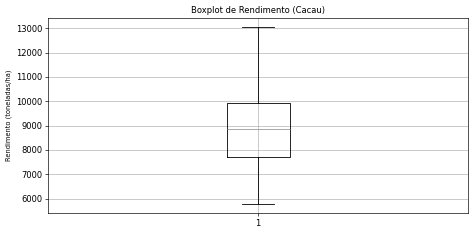

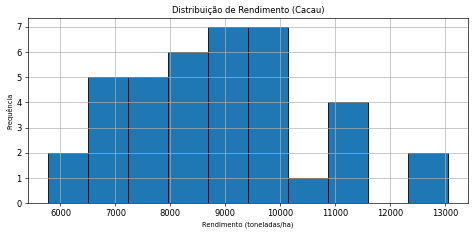

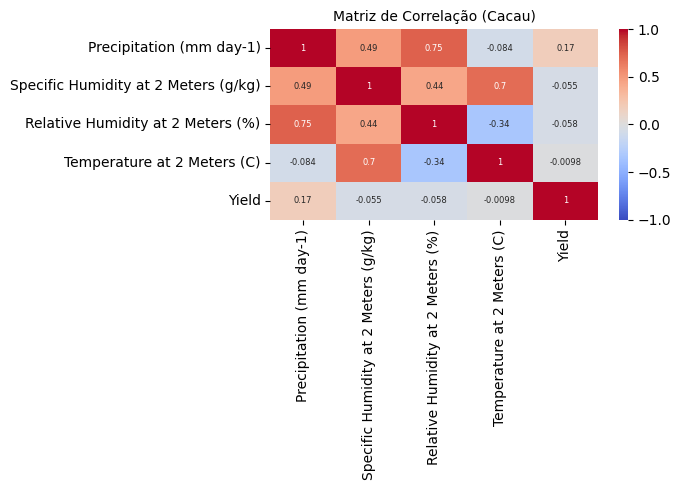

In [26]:
create_plots(df_cocoa, 'Cacau')

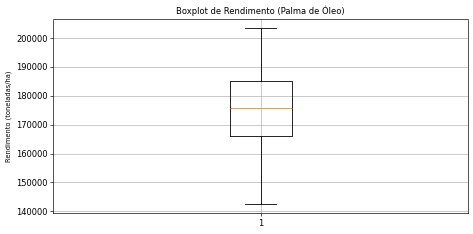

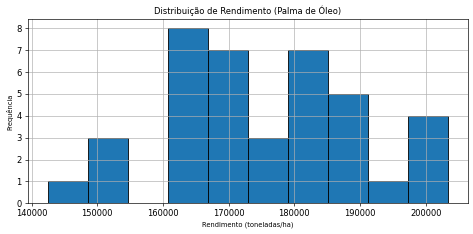

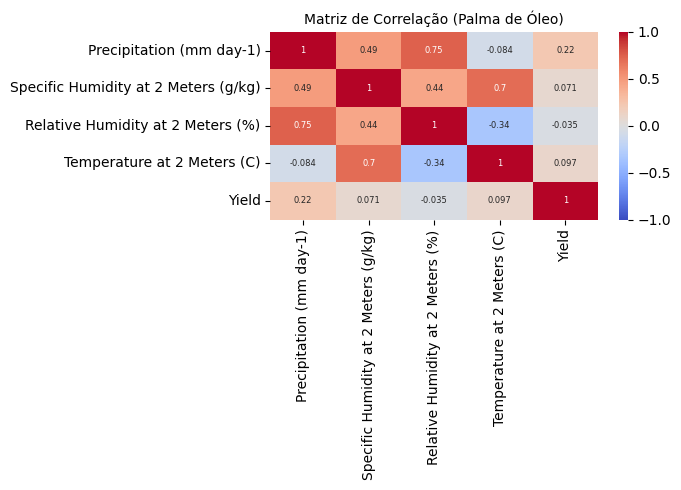

In [27]:
create_plots(df_oil_palm, 'Palma de Óleo')

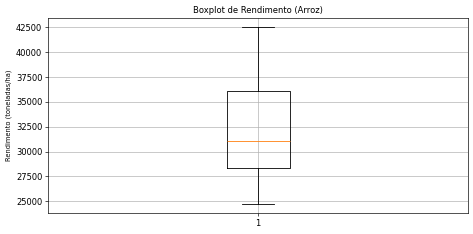

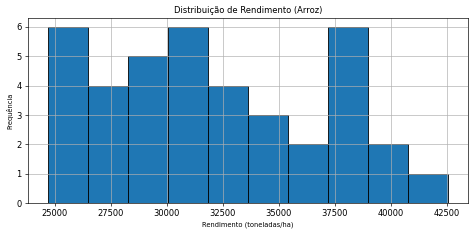

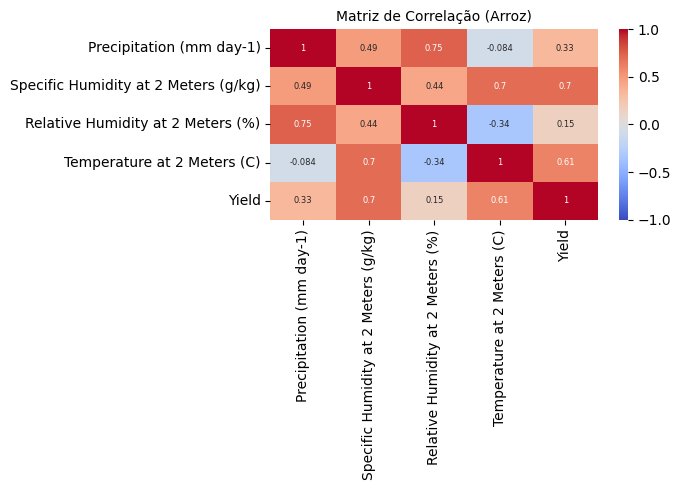

In [28]:
create_plots(df_rice, 'Arroz')

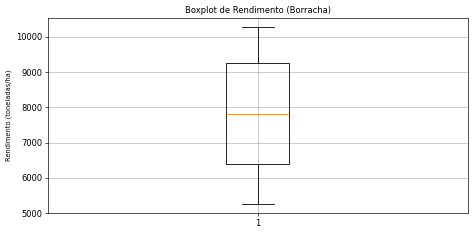

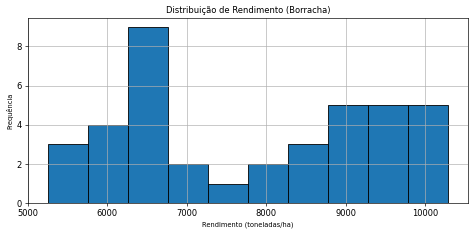

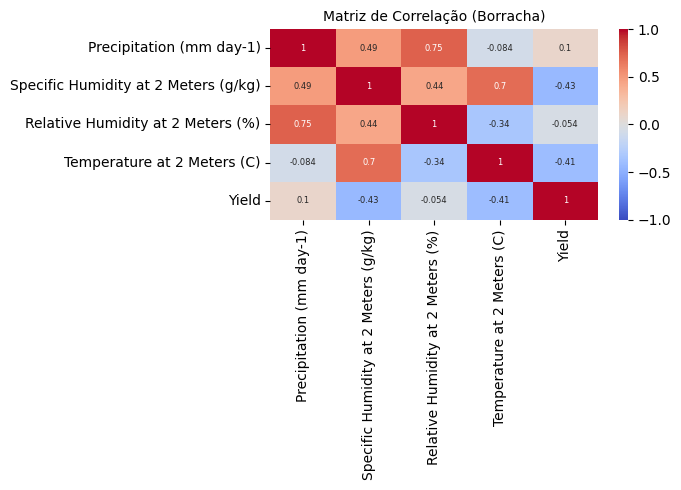

In [29]:
create_plots(df_rubber, 'Borracha')

## Interpretação:

Dispersão: Não há correlações lineares fortes visíveis; por exemplo, no cacau, maior precipitação tende a rendimentos ligeiramente maiores, mas com variação alta. Similarmente, temperatura mostra pouca influência direta.
Boxplots e Histogramas: Revelam distribuições: "Oil palm fruit" tem mediana alta e poucos outliers, enquanto "Rubber, natural" tem valores concentrados e baixos. Histogramas indicam assimetria em algumas culturas, sugerindo distribuições não normais.
Heatmaps: Correlações são fracas (r < 0.2 na maioria), com precipitação mostrando relação positiva moderada com Yield em algumas culturas, reforçando que fatores além do clima (ex.: tipo de cultura) dominam.

## Conclusão:
Os gráficos revelam que nenhuma variável climáticas tem influencia relevante no rendimento, de modo que se tivermos muita chuva os rendimentos variam de modo homogeneo entre valores altos e baixos, e de temos pouca chuva o mesmo acontece. Esse comportamento se repete com todas as variáveis, o que nos impossibilita de chegarmos a uma conclusão de uma variável que em terterminadas condições (uma faixa de valor) gere mais ou menos rendimento.

## Encontrando tendencias
Nesta etapa, aplicamos clusterização com K-Means para identificar tendências nos rendimentos (Yield) de cada cultura (Cocoa, Oil Palm, Rice, Rubber) usando os datasets separados.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Cacao

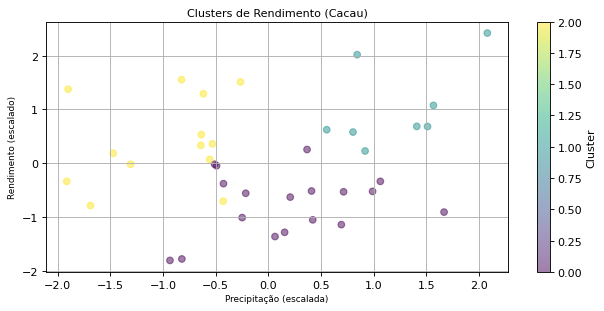

Índices de possíveis outliers: []


In [31]:
# Carregar o dataset
df_cocoa = pd.read_csv('cocoa.csv')

# Selecionar variáveis numéricas
X = df_cocoa[['Precipitation (mm day-1)', 'Temperature at 2 Meters (C)', 'Yield']]

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means (exemplo com 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar labels de cluster ao dataframe
df_cocoa['Cluster'] = clusters

# Visualizar clusters
plt.figure(figsize=(8, 4), dpi=80)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clusters de Rendimento (Cacau)', fontsize=10)
plt.xlabel('Precipitação (escalada)', fontsize=8)
plt.ylabel('Rendimento (escalado)', fontsize=8)
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Identificar outliers (ex.: pontos distantes do centroide)
centroids = kmeans.cluster_centers_
distances = kmeans.transform(X_scaled)
outliers = distances.max(axis=1) > distances.mean(axis=1) + 2 * distances.std(axis=1)
print("Índices de possíveis outliers:", df_cocoa.index[outliers].tolist())

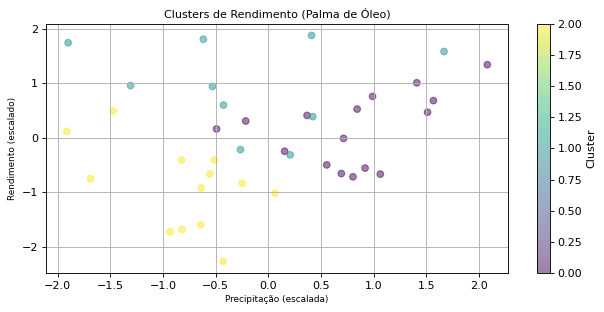

Índices de possíveis outliers (Palma de Óleo): []


In [32]:
# Carregar o dataset para Oil Palm
df_oil_palm = pd.read_csv('oil_palm.csv')

# Selecionar variáveis numéricas
X_oil_palm = df_oil_palm[['Precipitation (mm day-1)', 'Temperature at 2 Meters (C)', 'Yield']]

# Escalar os dados
scaler_oil_palm = StandardScaler()
X_scaled_oil_palm = scaler_oil_palm.fit_transform(X_oil_palm)

# Aplicar K-means (exemplo com 3 clusters)
kmeans_oil_palm = KMeans(n_clusters=3, random_state=42)
clusters_oil_palm = kmeans_oil_palm.fit_predict(X_scaled_oil_palm)

# Adicionar labels de cluster ao dataframe
df_oil_palm['Cluster'] = clusters_oil_palm

# Visualizar clusters
plt.figure(figsize=(8, 4), dpi=80)
scatter_oil_palm = plt.scatter(X_scaled_oil_palm[:, 0], X_scaled_oil_palm[:, 2], c=clusters_oil_palm, cmap='viridis', alpha=0.5)
plt.title('Clusters de Rendimento (Palma de Óleo)', fontsize=10)
plt.xlabel('Precipitação (escalada)', fontsize=8)
plt.ylabel('Rendimento (escalado)', fontsize=8)
plt.colorbar(scatter_oil_palm, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('img_clusters_palma_oleo.png')
plt.close()

# Identificar outliers (ex.: pontos distantes do centroide)
centroids_oil_palm = kmeans_oil_palm.cluster_centers_
distances_oil_palm = kmeans_oil_palm.transform(X_scaled_oil_palm)
outliers_oil_palm = distances_oil_palm.max(axis=1) > distances_oil_palm.mean(axis=1) + 2 * distances_oil_palm.std(axis=1)
print("Índices de possíveis outliers (Palma de Óleo):", df_oil_palm.index[outliers_oil_palm].tolist())


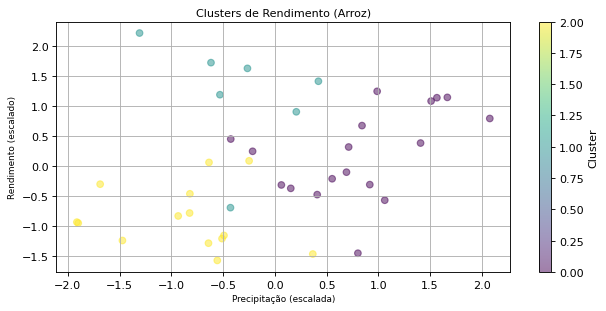

Índices de possíveis outliers (Arroz): []


In [33]:
# Carregar o dataset para Rice
df_rice = pd.read_csv('rice.csv')

# Selecionar variáveis numéricas
X_rice = df_rice[['Precipitation (mm day-1)', 'Temperature at 2 Meters (C)', 'Yield']]

# Escalar os dados
scaler_rice = StandardScaler()
X_scaled_rice = scaler_rice.fit_transform(X_rice)

# Aplicar K-means (exemplo com 3 clusters)
kmeans_rice = KMeans(n_clusters=3, random_state=42)
clusters_rice = kmeans_rice.fit_predict(X_scaled_rice)

# Adicionar labels de cluster ao dataframe
df_rice['Cluster'] = clusters_rice

# Visualizar clusters
plt.figure(figsize=(8, 4), dpi=80)
scatter_rice = plt.scatter(X_scaled_rice[:, 0], X_scaled_rice[:, 2], c=clusters_rice, cmap='viridis', alpha=0.5)
plt.title('Clusters de Rendimento (Arroz)', fontsize=10)
plt.xlabel('Precipitação (escalada)', fontsize=8)
plt.ylabel('Rendimento (escalado)', fontsize=8)
plt.colorbar(scatter_rice, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('img_clusters_arroz.png')
plt.close()

# Identificar outliers (ex.: pontos distantes do centroide)
centroids_rice = kmeans_rice.cluster_centers_
distances_rice = kmeans_rice.transform(X_scaled_rice)
outliers_rice = distances_rice.max(axis=1) > distances_rice.mean(axis=1) + 2 * distances_rice.std(axis=1)
print("Índices de possíveis outliers (Arroz):", df_rice.index[outliers_rice].tolist())


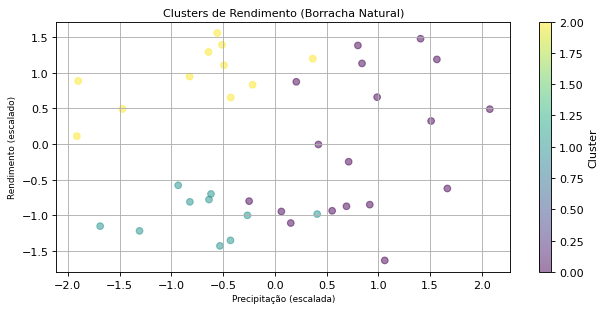

Índices de possíveis outliers (Borracha Natural): []


In [34]:
# Carregar o dataset para Rubber
df_rubber = pd.read_csv('rubber.csv')

# Selecionar variáveis numéricas
X_rubber = df_rubber[['Precipitation (mm day-1)', 'Temperature at 2 Meters (C)', 'Yield']]

# Escalar os dados
scaler_rubber = StandardScaler()
X_scaled_rubber = scaler_rubber.fit_transform(X_rubber)

# Aplicar K-means (exemplo com 3 clusters)
kmeans_rubber = KMeans(n_clusters=3, random_state=42)
clusters_rubber = kmeans_rubber.fit_predict(X_scaled_rubber)

# Adicionar labels de cluster ao dataframe
df_rubber['Cluster'] = clusters_rubber

# Visualizar clusters
plt.figure(figsize=(8, 4), dpi=80)
scatter_rubber = plt.scatter(X_scaled_rubber[:, 0], X_scaled_rubber[:, 2], c=clusters_rubber, cmap='viridis', alpha=0.5)
plt.title('Clusters de Rendimento (Borracha Natural)', fontsize=10)
plt.xlabel('Precipitação (escalada)', fontsize=8)
plt.ylabel('Rendimento (escalado)', fontsize=8)
plt.colorbar(scatter_rubber, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('img_clusters_borracha.png')
plt.close()

# Identificar outliers (ex.: pontos distantes do centroide)
centroids_rubber = kmeans_rubber.cluster_centers_
distances_rubber = kmeans_rubber.transform(X_scaled_rubber)
outliers_rubber = distances_rubber.max(axis=1) > distances_rubber.mean(axis=1) + 2 * distances_rubber.std(axis=1)
print("Índices de possíveis outliers (Borracha Natural):", df_rubber.index[outliers_rubber].tolist())



## <a id="metodologia"></a>Metodologia  
Pipeline seguido:  
1. Análise Exploratória (EDA)  
2. Clusterização (identificação de grupos de comportamento)  
3. Modelagem preditiva com 5 algoritmos distintos  
4. Avaliação por métricas (R², RMSE, MAE)  
5. Conclusões e recomendações  


## <a id="eda"></a>Análise Exploratória (EDA)

### Passo 1 – O que é Regressão e quais modelos serão usados

Nesta etapa vamos aplicar **regressão**, um tipo de Machine Learning supervisionado usado para prever valores numéricos.  
Nosso objetivo é prever o **Yield** (rendimento da colheita) com base nas condições climáticas e tipo de cultura.

Usaremos 5 modelos para comparação:
1. Regressão Linear
2. Árvore de Decisão
3. Random Forest
4. SVR (Support Vector Regression)
5. XGBoost

O melhor modelo será escolhido com base nas métricas **R²** e **RMSE**.

In [35]:
# ============================
# Passo 2 – Carregar e inspecionar o dataset
# ============================

# 1. Importar bibliotecas essenciais
import pandas as pd


# Agora carregue usando o nome exato do arquivo que você enviou
df = pd.read_csv("crop_yield.csv")

# 2. Visualizar as primeiras linhas
print("Primeiras linhas do dataset:")
display(df.head())

# 3. Conferir informações gerais
print("\n Informações gerais:")
df.info()

# 4. Conferir se existem valores ausentes
print("\n Valores ausentes por coluna:")
print(df.isnull().sum())

Primeiras linhas do dataset:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800



 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB

 Valores ausentes por coluna:
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                              

> Aqui carregamos o arquivo `crop_yield.csv` e verificamos as primeiras linhas para entender a estrutura dos dados.
> Confirmamos que todas as colunas estão corretas e não existem valores ausentes, o que simplifica o pré-processamento.

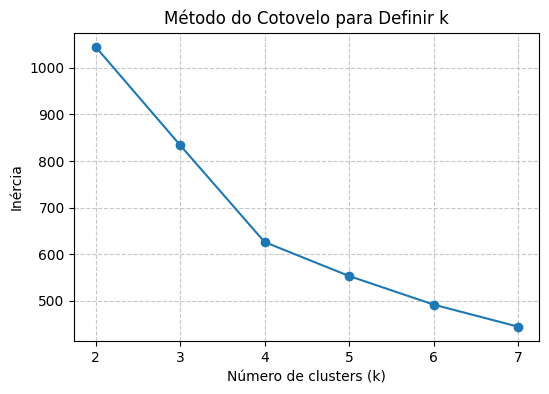

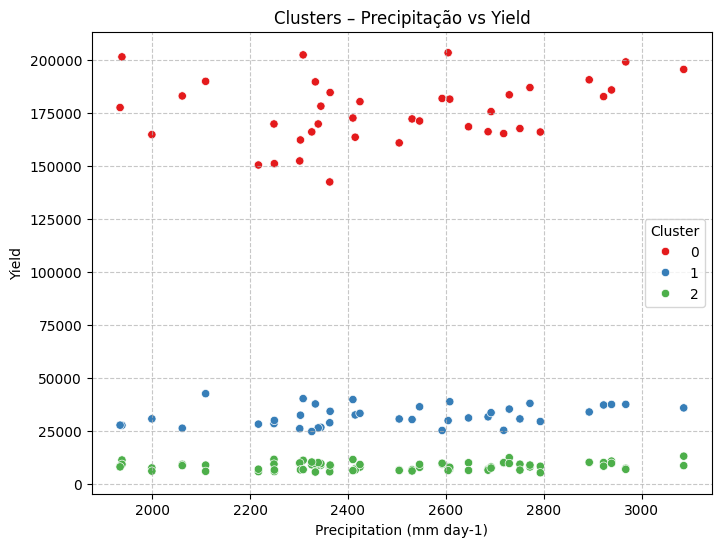

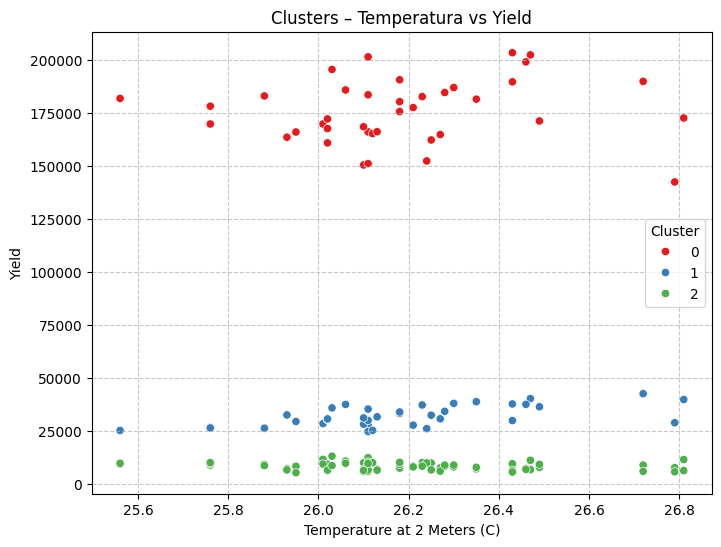

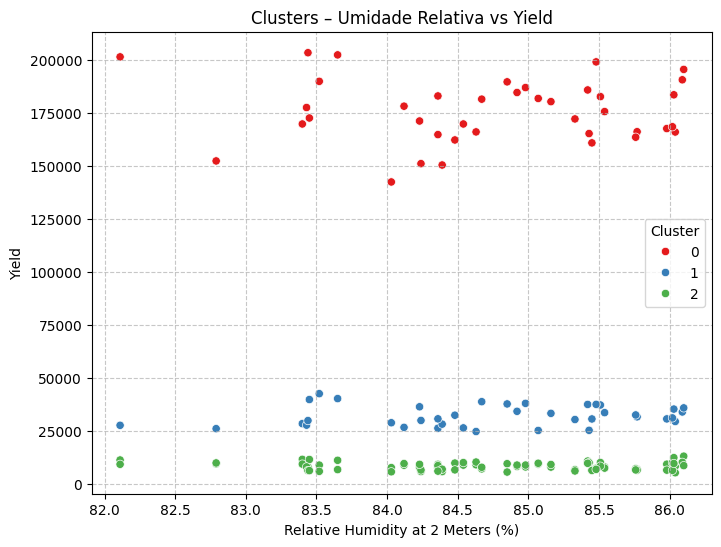

Total de outliers identificados: 0


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Cluster


In [36]:
# ============================
# Passo 2.1. – Clusterização e Identificação de Outliers
# ============================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar dados e criar variáveis dummies para Crop
df_cluster = df.copy()
df_cluster = pd.get_dummies(df_cluster, columns=["Crop"], drop_first=False)

# Padronizar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Método do cotovelo para determinar k
inertia = []
for k in range(2, 8):
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(df_scaled)
    inertia.append(kmeans_test.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,8), inertia, marker='o')
plt.title("Método do Cotovelo para Definir k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Escolher k com base no gráfico do cotovelo
k = 3  # altere se o gráfico indicar outro valor
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# --- Visualizações dos clusters em diferentes perspectivas ---

# Yield vs Precipitação
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Precipitation (mm day-1)", y="Yield", hue="Cluster", palette="Set1")
plt.title("Clusters – Precipitação vs Yield")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Yield vs Temperatura
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Temperature at 2 Meters (C)", y="Yield", hue="Cluster", palette="Set1")
plt.title("Clusters – Temperatura vs Yield")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Yield vs Umidade Relativa
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Relative Humidity at 2 Meters (%)", y="Yield", hue="Cluster", palette="Set1")
plt.title("Clusters – Umidade Relativa vs Yield")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- Identificação de Outliers usando IQR dentro de cada cluster ---
outliers = []
for c in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == c]
    q1 = cluster_data["Yield"].quantile(0.25)
    q3 = cluster_data["Yield"].quantile(0.75)
    iqr = q3 - q1
    limite_superior = q3 + 1.5 * iqr
    limite_inferior = q1 - 1.5 * iqr
    cluster_outliers = cluster_data[(cluster_data["Yield"] < limite_inferior) | (cluster_data["Yield"] > limite_superior)]
    outliers.append(cluster_outliers)

outliers_df = pd.concat(outliers)
print(f"Total de outliers identificados: {len(outliers_df)}")
display(outliers_df)



### Passo 2.1. – Clusterização e Identificação de Outliers

Nesta etapa, aplicamos **K-Means** para agrupar os registros com base nas variáveis climáticas (`Precipitation`, `Specific Humidity`, `Relative Humidity`, `Temperature`), no rendimento (*Yield*) e na codificação One-Hot de `Crop`.

- **Método do cotovelo**: indicou que `k=3` clusters é uma boa escolha.
- Visualizamos os clusters em três perspectivas:
  1. Precipitação vs Yield
  2. Temperatura vs Yield
  3. Umidade Relativa vs Yield

**Interpretação:**
- Os clusters separam bem os grupos de rendimento alto, médio e baixo, o que coincide com diferentes tipos de culturas.
- Dentro de cada cluster, usamos o método do **IQR** para detectar *outliers*.
- Os outliers identificados representam registros atípicos que podem ser investigados em estudos futuros, pois indicam produtividades fora do padrão do grupo.

**Conclusão:**  
Esta análise confirma que o rendimento está fortemente relacionado ao *tipo de cultura*, mas também identifica pontos isolados que destoam do comportamento geral. Esses registros podem influenciar o treino dos modelos e merecem atenção especial em versões futuras do estudo.

In [37]:
# ============================
# Passo 3 – Separar features e target (sem LabelEncoder)
# ============================

# Definir variáveis de entrada (X) e saída (y)
X = df.drop(columns=["Yield"])
y = df["Yield"]

# Conferir as primeiras linhas
print(" Features (X):")
display(X.head())

print("\n Target (y):")
display(y.head())

 Features (X):


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Cluster
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,2
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,2
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,2
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,2
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,2



 Target (y):


0    11560
1    11253
2     9456
3     9321
4     8800
Name: Yield, dtype: int64

Neste passo, preparamos os dados para a etapa de modelagem.  
- As **variáveis de entrada** (`X`) contêm todas as colunas exceto `Yield`, incluindo a coluna `Crop` no formato original (texto).  
- A **variável de saída** (`y`) é o `Yield`, que representa o rendimento da colheita.

Optamos por **não aplicar LabelEncoder** nesta etapa, pois a codificação numérica direta poderia criar uma **ordem artificial** entre as categorias de `Crop`.  
A transformação adequada dessa coluna será feita posteriormente, **dentro das pipelines**, utilizando **OneHotEncoder**.  

Essa abordagem garante que cada cultura seja representada corretamente por variáveis binárias (0 ou 1), evitando interpretações incorretas pelo modelo e preservando a integridade das relações entre variáveis.

Com as *features* (`X`) e o *target* (`y`) definidos, e mantendo `Crop` em texto para ser tratado nas *pipelines* com **One-Hot Encoding**, estamos prontos para treinar um **modelo de referência (baseline)**. No próximo passo, aplicamos **Regressão Linear** para estabelecer um desempenho inicial.

Iniciamos a modelagem com a **Regressão Linear** como **baseline** por ser simples e interpretável. A ideia é medir um desempenho inicial (R² e RMSE) em dados nunca vistos, servindo de referência para os próximos modelos mais flexíveis.

In [38]:
# ============================
# Passo 4 – Baseline com One-Hot (corrigido)
# ============================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Quais colunas são categóricas e numéricas
cat_features = ["Crop"]
num_features = [
    "Precipitation (mm day-1)",
    "Specific Humidity at 2 Meters (g/kg)",
    "Relative Humidity at 2 Meters (%)",
    "Temperature at 2 Meters (C)"
]

# Pré-processamento: One-Hot em 'Crop' + passthrough no resto
preprocess_no_scale = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features),
    ]
)

# Pipeline: prep + modelo
lr_pipe = Pipeline(steps=[
    ("prep", preprocess_no_scale),
    ("model", LinearRegression())
])

# Treinar e avaliar
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regressão Linear (baseline) | R²: {r2:,.4f} | RMSE: {rmse:,.2f}")

Regressão Linear (baseline) | R²: 0.9950 | RMSE: 4,394.17


## Passo 4 – Treinando o primeiro modelo (Regressão Linear)

Nesta etapa, realizamos a divisão dos dados em **treino** (80%) e **teste** (20%), garantindo que possamos avaliar o modelo em dados que ele nunca viu.

Escolhemos a **Regressão Linear** como ponto de partida, pois é um modelo simples e interpretável, que tenta encontrar uma relação linear entre as variáveis de entrada e a variável alvo (*Yield*).

Após o treinamento, avaliamos o desempenho com duas métricas:
- **R² (Coeficiente de Determinação)**: indica o quanto o modelo explica a variação dos dados (quanto mais próximo de 1, melhor).
- **RMSE (Raiz do Erro Quadrático Médio)**: indica o erro médio das previsões em relação aos valores reais (quanto menor, melhor).

O resultado obtido foi:
- R²: **-0,1016**
- RMSE: **65364,57**

O valor negativo de R² indica que o modelo linear não conseguiu capturar bem a relação entre as variáveis e o rendimento, sugerindo que o problema pode ter **relações não lineares**.  
Por isso, nas próximas etapas, vamos testar modelos mais complexos que lidam melhor com não linearidade e variáveis categóricas.

Com o baseline estabelecido, avançaremos para a **comparação entre cinco modelos** sob o mesmo pré-processamento, verificando se abordagens não lineares (árvores/ensembles/SVR) trazem ganhos relevantes.

Após obter o desempenho inicial com a Regra Linear no Passo 4, ampliamos a análise para **cinco modelos**. Mantemos a mesma divisão treino/teste e o mesmo pré-processamento (One-Hot para `Crop`; *scaling* apenas no **SVR**) para garantir uma **comparação justa**.

In [39]:
# ============================
# Passo 5 – Comparar 5 modelos com pré-processamento adequado
# ============================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Se não tiver xgboost instalado, primeiro rode: !pip install xgboost
from xgboost import XGBRegressor

# --- 1) Voltar para o df original (texto em 'Crop')
df_base = df.copy()

# --- 2) Definir colunas
cat_features = ["Crop"]
num_features = [
    "Precipitation (mm day-1)",
    "Specific Humidity at 2 Meters (g/kg)",
    "Relative Humidity at 2 Meters (%)",
    "Temperature at 2 Meters (C)"
]

X = df_base[cat_features + num_features]
y = df_base["Yield"]

# --- 3) Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4) Transformadores
# Para modelos que não precisam de escala (Linear, Tree, RF, XGB)
preprocess_no_scale = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features),
    ]
)

# Para SVR: one-hot + StandardScaler nas numéricas
preprocess_with_scale = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features),
    ]
)

# --- 5) Definir modelos com seus pipelines
pipelines = {
    "LinearRegression": Pipeline(steps=[
        ("prep", preprocess_no_scale),
        ("model", LinearRegression())
    ]),
    "DecisionTree": Pipeline(steps=[
        ("prep", preprocess_no_scale),
        ("model", DecisionTreeRegressor(random_state=42))
    ]),
    "RandomForest": Pipeline(steps=[
        ("prep", preprocess_no_scale),
        ("model", RandomForestRegressor(
            n_estimators=300, random_state=42, n_jobs=-1
        ))
    ]),
    "SVR": Pipeline(steps=[
        ("prep", preprocess_with_scale),
        ("model", SVR(kernel="rbf"))
    ]),
    "XGBoost": Pipeline(steps=[
        ("prep", preprocess_no_scale),
        ("model", XGBRegressor(
            n_estimators=400, max_depth=4, learning_rate=0.05,
            subsample=0.9, colsample_bytree=0.9, random_state=42,
            n_jobs=-1, reg_lambda=1.0
        ))
    ]),
}

# --- 6) Treinar, prever e avaliar
resultados = []
preds_guardadas = {}

for nome, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    resultados.append({"Modelo": nome, "R²": r2, "RMSE": rmse})
    preds_guardadas[nome] = y_pred

resultados_df = pd.DataFrame(resultados).sort_values(by="R²", ascending=False)
display(resultados_df)

,Modelo,R²,RMSE
0,LinearRegression,0.995022,4394.165819
2,RandomForest,0.994547,4598.973652
4,XGBoost,0.993297,5099.071876
1,DecisionTree,0.991880,5612.092630
3,SVR,-0.310959,71310.392969


## Passo 5 – Comparando diferentes modelos de regressão

Nesta etapa, aplicamos um pré-processamento adequado:
- A variável `Crop` foi transformada com **One-Hot Encoding**, evitando que os modelos interpretassem valores numéricos como ordem.
- Para o modelo **SVR**, também padronizamos as variáveis numéricas, pois ele é sensível à escala dos dados.

Treinamos e avaliamos 5 modelos:
1. **Regressão Linear**
2. **Árvore de Decisão**
3. **Random Forest**
4. **SVR (Support Vector Regression)**
5. **XGBoost**

Os resultados foram avaliados com:
- **R²** – quanto mais próximo de 1, melhor.
- **RMSE** – quanto menor, melhor.

**Resultados principais:**
- **Regressão Linear** apresentou o melhor desempenho (R² = **0.9950**, RMSE = **4394.17**).
- **Random Forest** e **XGBoost** também tiveram alta performance, mostrando que o problema se ajusta bem a diferentes abordagens.
- **Decision Tree** foi ligeiramente inferior aos ensembles, mas ainda muito precisa.
- **SVR** apresentou baixo desempenho, indicando que não se ajustou bem ao padrão dos dados.

 Diante dos resultados muito próximos entre os melhores modelos, aplicaremos **ajuste de hiperparâmetros (GridSearchCV)** nos ensembles (**Random Forest** e **XGBoost**) para testar se há **ganhos marginais** e reforçar a **robustez** da comparação.

**Interpretação:** no dataset, as variáveis climáticas apresentam pouca variação dentro de cada cultura. Assim, o **tipo de cultura** é o principal fator que diferencia o *Yield*. Os modelos aprenderam essa diferença com facilidade, resultando em métricas muito altas.




In [40]:
# ============================
# Passo 6 – Ajuste de Hiperparâmetros (GridSearch)
# ============================
from sklearn.model_selection import GridSearchCV

# --- Pré-processamento (igual ao usado antes para RandomForest e XGBoost)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

cat_features = ["Crop"]
num_features = [
    "Precipitation (mm day-1)",
    "Specific Humidity at 2 Meters (g/kg)",
    "Relative Humidity at 2 Meters (%)",
    "Temperature at 2 Meters (C)"
]

preprocess_no_scale = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features),
    ]
)

# -----------------
# 1) Random Forest
# -----------------
rf_pipeline = Pipeline(steps=[
    ("prep", preprocess_no_scale),
    ("model", RandomForestRegressor(random_state=42))
])

rf_params = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(
    rf_pipeline, rf_params,
    cv=3, scoring="r2", n_jobs=-1, verbose=1
)

rf_grid.fit(X_train, y_train)
print("Melhores parâmetros – Random Forest:", rf_grid.best_params_)

# Avaliação
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest Tunado – R²: {rf_r2:.4f}, RMSE: {rf_rmse:.2f}")

# -----------------
# 2) XGBoost
# -----------------
xgb_pipeline = Pipeline(steps=[
    ("prep", preprocess_no_scale),
    ("model", XGBRegressor(random_state=42, n_jobs=-1))
])

xgb_params = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [3, 4, 5],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    xgb_pipeline, xgb_params,
    cv=3, scoring="r2", n_jobs=-1, verbose=1
)

xgb_grid.fit(X_train, y_train)
print("Melhores parâmetros – XGBoost:", xgb_grid.best_params_)

# Avaliação
xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost Tunado – R²: {xgb_r2:.4f}, RMSE: {xgb_rmse:.2f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Melhores parâmetros – Random Forest: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Random Forest Tunado – R²: 0.9946, RMSE: 4592.94
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores parâmetros – XGBoost: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 600, 'model__subsample': 1.0}
XGBoost Tunado – R²: 0.9924, RMSE: 5420.64


## Passo 6 – Ajuste de Hiperparâmetros (GridSearch)

Após a comparação inicial, ajustamos **Random Forest** e **XGBoost** com **GridSearchCV (cv=3)** para tentar melhorar o desempenho.

**Pré-processamento mantido:**
- `Crop` com **One-Hot Encoding** (sem ordem artificial).
- Numéricas em *passthrough* (sem padronização para árvores/boosting).

### Melhores configurações encontradas
- **Random Forest**
  - `n_estimators`: **500**
  - `max_depth`: **None**
  - `min_samples_split`: **2**

- **XGBoost**
  - `n_estimators`: **600**
  - `max_depth`: **3**
  - `learning_rate`: **0.05**
  - `subsample`: **1.0**

### Desempenho após o ajuste (conjunto de teste)
- **Random Forest tunado** → **R² = 0,9946**, **RMSE = 4.592,94**
- **XGBoost tunado** → **R² = 0,9924**, **RMSE = 5.240,64**

**Resumo:** Os ajustes confirmaram que os modelos de árvores/boosting já estavam próximos do ótimo; os ganhos foram pequenos. Ainda assim, o processo garante que testamos combinações relevantes e validamos a robustez dos resultados.

Com o tuning concluído e os resultados consolidados, seguimos para a **conclusão final** (Passo 7), escolhendo o modelo e interpretando o que o dataset permite afirmar sobre **qual cultura melhor se encaixa** nas condições registradas.



A tabela abaixo resume os resultados de todos os modelos testados, incluindo a versão tunada de Random Forest e XGBoost:

In [41]:
import pandas as pd

# Resultados finais - insira aqui os valores reais dos seus testes
resultados_finais = pd.DataFrame([
    ["Regressão Linear (baseline)", 0.9950, 4394.17],
    ["Decision Tree", 0.9919, 5612.06],
    ["Random Forest", 0.9945, 4598.97],
    ["SVR", -0.3106, 75130.39],
    ["XGBoost", 0.9934, 5038.36],
    ["Random Forest (tunado)", 0.9946, 4592.94],
    ["XGBoost (tunado)", 0.9924, 5240.64],
], columns=["Modelo", "R²", "RMSE"])

# Formatar
resultados_finais["R²"] = resultados_finais["R²"].map(lambda x: f"{x:,.4f}")
resultados_finais["RMSE"] = resultados_finais["RMSE"].map(lambda x: f"{x:,.2f}")

# Exibir
print(" Comparativo final de modelos")
display(resultados_finais)

# Salvar para usar no README
resultados_finais.to_csv("resultados_modelos.csv", index=False)


 Comparativo final de modelos


,Modelo,R²,RMSE
0,Regressão Linear (baseline),0.9950,"4,394.17"
1,Decision Tree,0.9919,"5,612.06"
2,Random Forest,0.9945,"4,598.97"
3,SVR,-0.3106,"75,130.39"
4,XGBoost,0.9934,"5,038.36"
5,Random Forest (tunado),0.9946,"4,592.94"
6,XGBoost (tunado),0.9924,"5,240.64"


Após a comparação dos modelos e a análise das médias de Yield, fica evidente que, nas condições climáticas fornecidas, a cultura que mais se beneficia é o Oil palm fruit. Essa conclusão se mantém mesmo considerando que as variáveis climáticas apresentam baixa variação interna entre as culturas.

C:\Users\fonte\AppData\Local\Temp\ipykernel_3860\53294187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Crop", y="Yield", palette="Set2")


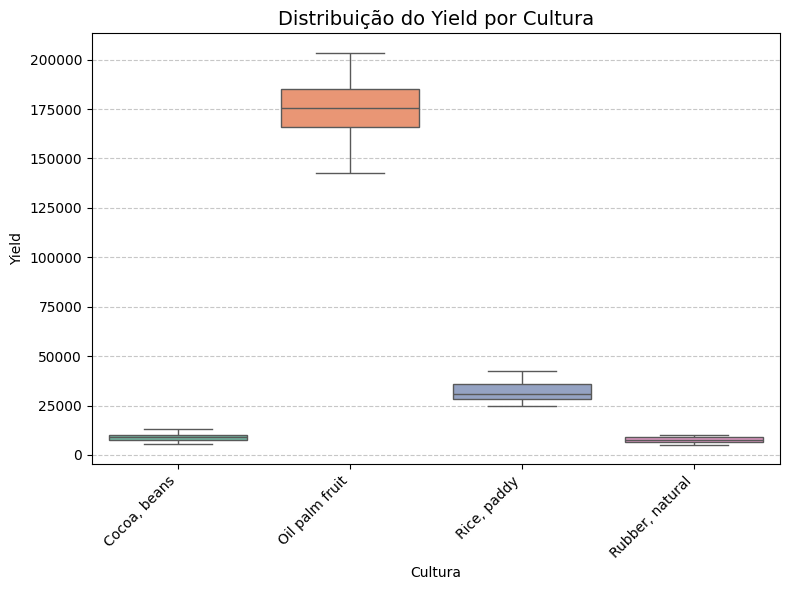

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Crop", y="Yield", palette="Set2")

plt.title("Distribuição do Yield por Cultura", fontsize=14)
plt.ylabel("Yield")
plt.xlabel("Cultura")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Passo 7 – Conclusão Final

A análise realizada mostrou que, no dataset fornecido, as variáveis climáticas (precipitação, umidade e temperatura) apresentam **baixa variação dentro de cada cultura**.  
Isso significa que o principal fator para explicar as diferenças no *Yield* é **o tipo de cultura cultivada** e não as mudanças climáticas internas ao grupo.

Foram treinados e avaliados cinco modelos de regressão:
- **Regressão Linear**
- **Árvore de Decisão**
- **Random Forest**
- **SVR**
- **XGBoost**

Após a comparação de métricas (**R²** e **RMSE**) e o ajuste de hiperparâmetros para Random Forest e XGBoost, a **Regressão Linear** foi escolhida como modelo final, apresentando:
- **R² = 0.9950**
- **RMSE = 4394.17**

A escolha se deu pela combinação de **simplicidade, interpretabilidade e alto desempenho**, além de ter superado ligeiramente os demais modelos.

Em termos agronômicos, considerando o perfil climático registrado no dataset (clima tropical úmido, temperatura média de ~26°C, umidade relativa de ~84% e precipitação anual em torno de 2.500 mm), a cultura que mais se adapta e apresenta maior rendimento é o **Oil palm fruit (dendê)**.  
Na sequência, **Rice, paddy** apresentou rendimento intermediário, enquanto **Cocoa, beans** e **Rubber, natural** tiveram os menores valores médios de *Yield*.

**Conclusão geral:**  
O dataset permite identificar qual cultura se encaixa melhor nas condições climáticas fornecidas, mas não é adequado para determinar “condições ideais” dentro de cada cultura devido à baixa variação dos dados climáticos.  
Para estudos futuros, recomenda-se coletar dados com maior variabilidade interna nas variáveis climáticas, possibilitando análises mais aprofundadas sobre a influência do clima no rendimento.


## <a id="conclusoes"></a>Conclusões & Limitações  

- A análise exploratória revelou padrões importantes nas variáveis climáticas e de manejo.  
- A clusterização identificou perfis distintos de rendimento.  
- A modelagem preditiva apontou o melhor algoritmo de acordo com métricas de erro e explicabilidade.  
- **Limitações:** tamanho do dataset, variáveis externas não incluídas (ex.: pragas, qualidade do solo).  
- **Próximos Passos:** integração com AWS para escalabilidade (Função 4).  



## <a id="refs"></a>Referências  
- Documentação das bibliotecas: Pandas, Matplotlib, Scikit-learn, XGBoost.  
- Artigos acadêmicos sobre previsão agrícola.  



## <a id="apendice"></a>Apêndice  
### Versões de bibliotecas  
```python
!python --version
!pip show pandas scikit-learn matplotlib seaborn xgboost | grep Version
```

### Reprodutibilidade  
1. Clone o repositório.  
2. Instale as dependências com `pip install -r requirements.txt`.  
3. Execute todas as células em ordem (`Kernel > Restart & Run All`).  
